In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot
plt=pyplot

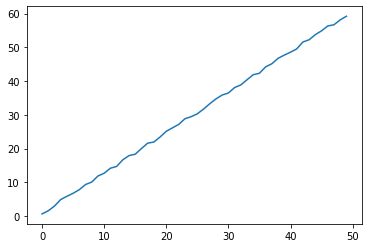

In [57]:
samples=50
x=np.arange(samples).astype(np.float32)
y=x*1.2+0.3+np.random.rand(samples)
y=y.astype(np.float32)
plt.plot(x,y)

In [58]:
m=tf.Variable([1],dtype=tf.float32)
c=tf.Variable([1],dtype=tf.float32)

In [59]:
@tf.function
def pred(x):
    y=tf.add(tf.multiply(x,m),c)
    return y

In [60]:
@tf.function
def loss(x,y):
    pred_y=pred(x)
    l= tf.reduce_mean(tf.abs(y-pred_y))
    return l

In [61]:
@tf.function
def train(x,y):
    grad=[0.1]
    grad2=tf.multiply(grad,2)
    L1=loss(x,y)
    m.assign_add(grad)
    L2=loss(x,y)
    dL=L2-L1
    if dL>0:
        m.assign_sub(grad2)
        L2=loss(x,y)
        dL=L2-L1
        if dL>0:
            m.assign_add(grad)
    
    L1=loss(x,y)
    c.assign_add(grad)
    L2=loss(x,y)
    dL=L2-L1
    if dL>0:
        c.assign_sub(grad2)
        L2=loss(x,y)
        dL=L2-L1
        if dL>0:
            c.assign_add(grad)
    return L1

In [62]:
def plot(x,y):
    pred_y=pred(x).numpy()
    plt.plot(x,y)
    plt.plot(x,pred_y)

In [56]:
board=tf.summary.create_file_writer("log/example")

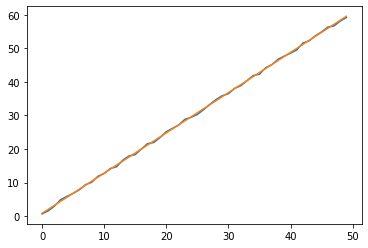

In [65]:
for epochs in range(20):
    with board.as_default():
        l=train(x,y).numpy()
        tf.summary.scalar("loss",l,step=epochs)
plot(x,y)